In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# 收盘价格
endprice = np.array([2511.90, 2538.26, 2510.68, 2591.66, 2732.98, 2701.69, 2701.29, 2678.67, 2726.50, 2681.50, 2739.17, 2715.07, 2823.58, 2864.90, 2919.08])
# 开盘价格
beginprice = np.array([2438.71, 2500.88, 2534.95, 2512.52, 2594.04, 2743.26, 2697.47, 2695.24, 2678.23, 2722.13, 2674.93, 2744.13, 2717.46, 2832.73, 2877.40])
date = np.linspace(1, 15, num=15)

In [53]:
print(date)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


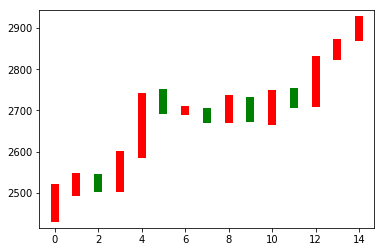

In [54]:
for i in range(0, 15):
    date_one = np.zeros([2])
    price_one = np.zeros([2])
    date_one[0] = i
    date_one[1] = i
    price_one[0] = beginprice[i]
    price_one[1] = endprice[i]
    if endprice[i] > beginprice[i]:
        plt.plot(date_one, price_one, c='r', lw=8)
    else:
        plt.plot(date_one, price_one, c='g', lw=8)
# plt.show()

In [55]:
# 三层简单神经网络
# 输入层：A(15 * 1) * w1(1 * 10) + b1(1 * 10) = B(15 * 10)
# 隐藏层：B(15 * 10) * w2(10 * 1) + b2(15 * 1) = C(15 * 1)
# 输出层：C
import tensorflow as tf

In [56]:
# A
price_normal = np.zeros([15, 1])
date_normal = np.zeros([15, 1])
for i in range(0, 15):
    date_normal[i, 0] = i / 14.0
    price_normal[i, 0] = endprice[i] / 3000.0
# 数据装载使用placeholder进行装载
x = tf.placeholder(tf.float32, [None, 1]) # [None, 1]表示N行1列
y = tf.placeholder(tf.float32, [None, 1])

In [57]:
# B
# 实现人工神经网络的隐藏层
w1 = tf.Variable(tf.random_uniform([1, 10], 0, 1))
b1 = tf.Variable(tf.zeros([1, 10]))
wb1 = tf.matmul(x, w1) + b1
# 激励函数
layer1 = tf.nn.relu(wb1) 

In [61]:
# 输出层
w2 = tf.Variable(tf.random_uniform([10, 1], 0, 1))
b2 = tf.Variable(tf.zeros([15, 1]))
wb2 = tf.matmul(layer1, w2) + b2
# 激励函数
layer2 = tf.nn.relu(wb2)

# 计算神经网络计算出的值与实际的差异
# 标准差
loss = tf.reduce_mean(tf.square(y - layer2)) # y是真实值，layer2是计算值

In [62]:
# 让损失函数逐渐减小
# 表示每次调整步长
# 梯度下降法有一个参数，每次调整多少，这里是0.1，每次梯度下降0.1
# minimize()是让梯度下降方法有一个目标，作用就是下降loss,也就是真实值与计算值之间的差值
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

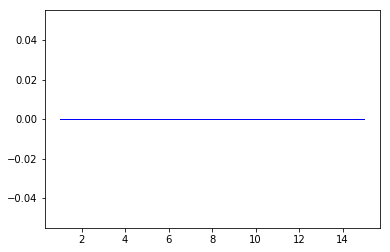

In [63]:
with tf.Session() as sess:
    # 初始化
    sess.run(tf.global_variables_initializer())
    # 开始训练，终止条件有2个，1：for循环控制，2：控制差距
    for i in range(0, 10000):
        sess.run(train_step, feed_dict={x:date_normal, y:price_normal})
    # 预测
    pred = sess.run(layer2, feed_dict = {x:date_normal})
    pred_price = np.zeros([15, 1])
    for i in range(0, 15):
        pred_price[i, 0] = (pred_price*3000)[i, 0]
    plt.plot(date, pred_price, 'b', lw=1)
plt.show()